In [1]:
# load required packages 
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the first data set
fs, data = wavfile.read("training/training-a/a0001.wav")

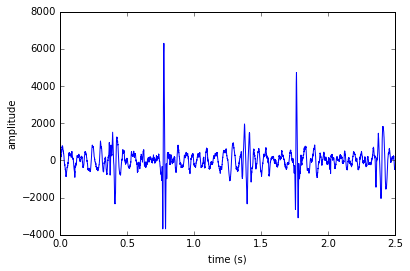

In [3]:
# visualize the first data set 
def plot_signal(data, fs, n_samples): 
    plt.plot((1./fs)*np.array(range(n_samples)), data[:n_samples])
    plt.xlabel("time (s)")
    plt.ylabel("amplitude")
    
plot_signal(data, fs, 5000)

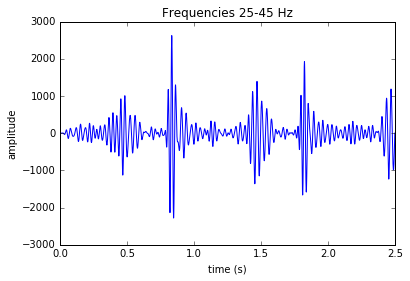

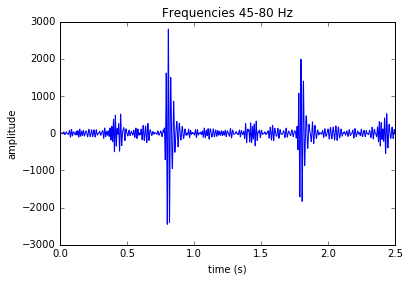

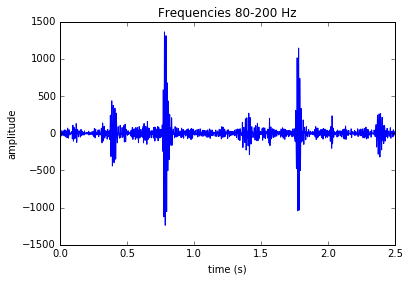

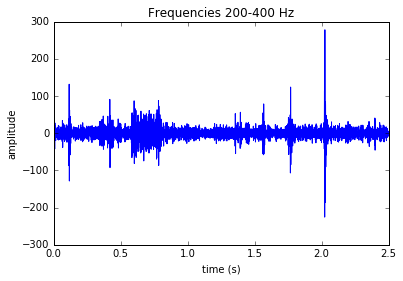

In [4]:
# decompose the signal based on frequency bands using Butterworth filter 

def butterworth_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butterworth_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butterworth_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def extract_frequency_bands(data, fs, filter_frequency_bands):
    data_filtered = np.zeros((len(data), 4))
    for k, band in enumerate(filter_frequency_bands):
        data_filtered[:, k] = butterworth_bandpass_filter(data, band[0], band[1], fs)
    return data_filtered

filter_frequency_bands = [(25, 45), (45, 80), (80, 200), (200, 400)]
data_filtered = extract_frequency_bands(data, fs, filter_frequency_bands)
for k in range(4):
    plot_signal(data_filtered[:, k], fs, 5000)
    plt.title("Frequencies %i-%i Hz"%filter_frequency_bands[k])
    plt.show()